<a href="https://colab.research.google.com/github/MAM-06/MAM/blob/main/ALGORITMA_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMA KNN  <a class="anchor" id="section_1"></a>

# IMPORT LIBRARY UTAMA <a class="anchor" id="section_2_1"></a>

In [ ]:
import numpy as np # linear algebra aljabar linier
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Membaca Data dan Praproses <a class="anchor" id="section_2_2"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INPUT DATASET

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/ANGKATAN.2021-2023.xlsx")

In [ ]:
print (data)

      NO                  Nama Siswa NISN IJAZAH  \
0      1                AMAR SUBEKTI  0065517838   
1      2     BAYU IRAWAN DWI SANTOSO  3052894868   
2      3          DA`A SAHRU ROZIKIN  0053965385   
3      4     DIMAS MAULANA RAMADHANI  0054861560   
4      5        FEBRIARDO EKA AQRAFA  0058815747   
..   ...                         ...         ...   
454  455         SULKHA NUR FADHILAH  0068242197   
455  456  TATA AURELYA PUTRI VIRTIDA  0069992032   
456  457    TRI AGUSTIN SETIANINGSIH  0066556811   
457  458           TUSAMMA SALSABILA  0076783641   
458  459              ZAKIA FARADIBA  3062951968   

     Nomor Induk Kependudukan\n (NIK) Siswa Jenis\nKelamin  \
0                          3603120209060001      Laki-laki   
1                          3505092806050001      Laki-laki   
2                          3505172112050001      Laki-laki   
3                          3507011910050001      Laki-laki   
4                          3572020902050002      Laki-laki   
.. 

In [ ]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

In [ ]:
obj_col = object_cols(data)
num_col = numerical_cols(data)

In [ ]:
obj_col

['Nama Siswa',
 'NISN IJAZAH',
 'Jenis\nKelamin',
 'Tempat Tanggal Lahir',
 'Asal Sekolah',
 ' Kelas']

In [ ]:
num_col

['NO',
 'Nomor Induk Kependudukan\n (NIK) Siswa',
 'Rata-rata nilai IPA',
 'Rata-rata nilai IPS',
 'Rata-rata nilai AGAMA']

In [ ]:
data.head()

,NO,Nama Siswa,NISN IJAZAH,Nomor Induk Kependudukan\n (NIK) Siswa,Jenis\nKelamin,Tempat Tanggal Lahir,Asal Sekolah,Rata-rata nilai IPA,Rata-rata nilai IPS,Rata-rata nilai AGAMA,Kelas
0,1,AMAR SUBEKTI,0065517838,3603120209060001,Laki-laki,"Tangerang, 02 September 2006",SMP ISLAM HARAPAN IBU SCHOOL,70.25,70.75,74.00,X.AGAMA.
1,2,BAYU IRAWAN DWI SANTOSO,3052894868,3505092806050001,Laki-laki,"Blitar, 28 Juni 2005",MTs MA'ARIF NU BLITAR,69.25,71.25,78.00,X.AGAMA.
2,3,DA`A SAHRU ROZIKIN,0053965385,3505172112050001,Laki-laki,"Blitar, 21 Desember 2005",MTs MA'ARIF NU BLITAR,71.50,66.25,92.00,X.AGAMA.
3,4,DIMAS MAULANA RAMADHANI,0054861560,3507011910050001,Laki-laki,"Malang, 19 Oktober 2005",MTs MA'ARIF NU BLITAR,67.25,72.75,69.00,X.AGAMA.
4,5,FEBRIARDO EKA AQRAFA,0058815747,3572020902050002,Laki-laki,"Blitar, 09 Februari 2005",SMP NEGERI 7 KOTA BLITAR,67.00,70.75,69.75,X.AGAMA.


# k-NN Algorithm with sklearn <a class="anchor" id="section_3"></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

PREPROCESSING DATA

In [ ]:
jumlah_missing = data.isnull().sum()
print(jumlah_missing)

NO                                        0
Nama Siswa                                0
NISN IJAZAH                               3
Nomor Induk Kependudukan\n (NIK) Siswa    0
Jenis\nKelamin                            0
Tempat Tanggal Lahir                      1
Asal Sekolah                              0
Rata-rata nilai IPA                       0
Rata-rata nilai IPS                       0
Rata-rata nilai AGAMA                     0
 Kelas                                    0
dtype: int64


In [ ]:
kolom_yang_dihapus = ['Nama Siswa', 'NISN IJAZAH', 'Nomor Induk Kependudukan\n (NIK) Siswa', 'Jenis\nKelamin', 'Tempat Tanggal Lahir', 'Asal Sekolah']
df = data.drop(columns=kolom_yang_dihapus)

print("\nKolom yang dihapus:")
print(kolom_yang_dihapus)
print("\nKolom yang digunakan:")
print(df.columns.tolist())


Kolom yang dihapus:
['Nama Siswa', 'NISN IJAZAH', 'Nomor Induk Kependudukan\n (NIK) Siswa', 'Jenis\nKelamin', 'Tempat Tanggal Lahir', 'Asal Sekolah']

Kolom yang digunakan:
['NO', 'Rata-rata nilai IPA', 'Rata-rata nilai IPS', 'Rata-rata nilai AGAMA', ' Kelas']


In [ ]:
print("\nDataFrame yang digunakan:")
print(df)


DataFrame yang digunakan:
      NO  Rata-rata nilai IPA  Rata-rata nilai IPS  Rata-rata nilai AGAMA  \
0      1                70.25                70.75                  74.00   
1      2                69.25                71.25                  78.00   
2      3                71.50                66.25                  92.00   
3      4                67.25                72.75                  69.00   
4      5                67.00                70.75                  69.75   
..   ...                  ...                  ...                    ...   
454  455                90.25                77.25                  77.75   
455  456                88.75                77.25                  76.50   
456  457                95.50                80.25                  74.50   
457  458                91.50                75.75                  74.25   
458  459                88.25                76.00                  75.25   

        Kelas  
0    X.AGAMA.  
1    X.AGAMA.  


In [ ]:
#rename " kelas" menjadi "kelas"
df.rename(columns={' Kelas': 'Kelas'}, inplace=True)
print(df)

      NO  Rata-rata nilai IPA  Rata-rata nilai IPS  Rata-rata nilai AGAMA  \
0      1                70.25                70.75                  74.00   
1      2                69.25                71.25                  78.00   
2      3                71.50                66.25                  92.00   
3      4                67.25                72.75                  69.00   
4      5                67.00                70.75                  69.75   
..   ...                  ...                  ...                    ...   
454  455                90.25                77.25                  77.75   
455  456                88.75                77.25                  76.50   
456  457                95.50                80.25                  74.50   
457  458                91.50                75.75                  74.25   
458  459                88.25                76.00                  75.25   

        Kelas  
0    X.AGAMA.  
1    X.AGAMA.  
2    X.AGAMA.  
3    X.AGAM

In [ ]:
#sesuaikan nama pada kolom kelas
df['Kelas'] = df['Kelas'].str.replace('X', '', regex=True).str.replace(' ', '', regex=True).str.replace('.', '', regex=True)
print(df)

      NO  Rata-rata nilai IPA  Rata-rata nilai IPS  Rata-rata nilai AGAMA  \
0      1                70.25                70.75                  74.00   
1      2                69.25                71.25                  78.00   
2      3                71.50                66.25                  92.00   
3      4                67.25                72.75                  69.00   
4      5                67.00                70.75                  69.75   
..   ...                  ...                  ...                    ...   
454  455                90.25                77.25                  77.75   
455  456                88.75                77.25                  76.50   
456  457                95.50                80.25                  74.50   
457  458                91.50                75.75                  74.25   
458  459                88.25                76.00                  75.25   

     Kelas  
0    AGAMA  
1    AGAMA  
2    AGAMA  
3    AGAMA  
4    AGAMA

In [ ]:
print(df.dtypes)

NO                         int64
Rata-rata nilai IPA      float64
Rata-rata nilai IPS      float64
Rata-rata nilai AGAMA    float64
Kelas                     object
dtype: object


In [ ]:
X = df.drop(['Kelas'], axis = 1)
y = df['Kelas']

print("Nilai X:")
print(X)
print("\nNilai y:")
print(y)

Nilai X:
      NO  Rata-rata nilai IPA  Rata-rata nilai IPS  Rata-rata nilai AGAMA
0      1                70.25                70.75                  74.00
1      2                69.25                71.25                  78.00
2      3                71.50                66.25                  92.00
3      4                67.25                72.75                  69.00
4      5                67.00                70.75                  69.75
..   ...                  ...                  ...                    ...
454  455                90.25                77.25                  77.75
455  456                88.75                77.25                  76.50
456  457                95.50                80.25                  74.50
457  458                91.50                75.75                  74.25
458  459                88.25                76.00                  75.25

[459 rows x 4 columns]

Nilai y:
0      AGAMA
1      AGAMA
2      AGAMA
3      AGAMA
4      AGAMA
    

MEMBAGI DATASET KE DATA TRAINING DAN TESTING

In [ ]:
from sklearn.model_selection import train_test_split #to split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (321, 4)
X_test shape: (138, 4)
y_train shape: (321,)
y_test shape: (138,)


In [ ]:
column_names = df.columns

print(column_names)

Index(['NO', 'Rata-rata nilai IPA', 'Rata-rata nilai IPS',
       'Rata-rata nilai AGAMA', 'Kelas'],
      dtype='object')


SCALING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
print(X_test_scaled)

[[-8.71374444e-01 -3.70384318e-01 -2.06274446e-01  1.97567070e+00]
 [-1.61979756e+00 -1.52416783e+00 -1.14423421e+00  2.52674327e-01]
 [-2.74228341e-01 -7.72866939e-01  5.55817864e-01 -8.32175242e-01]
 [ 1.62867724e+00  1.10538529e+00 -5.97182328e-02  6.35562410e-01]
 [-6.32516003e-01 -4.77713017e-01 -1.58390285e+00 -3.21657798e-01]
 [-6.72176922e-02 -5.58209541e-01  1.61102260e+00 -1.31078535e+00]
 [ 1.36593296e+00  1.32004269e+00 -1.20285670e+00 -9.83064160e-02]
 [ 4.98080619e-01 -7.72866939e-01  1.37653266e+00 -7.68360562e-01]
 [-9.11035363e-02 -4.77713017e-01  9.07552777e-01 -8.64082582e-01]
 [-1.26150990e+00 -6.92370415e-01  5.75267380e-02  1.33752390e+00]
 [ 1.72422062e+00  1.42737139e+00 -2.06274446e-01  3.16489008e-01]
 [ 8.64330229e-01  2.73587875e-01 -2.64896932e-01 -1.11934130e+00]
 [-1.23762405e+00 -5.31377366e-01  7.90307806e-01  8.58913792e-01]
 [ 7.84710748e-01  9.44392243e-01 -9.09744272e-01  6.67469750e-01]
 [ 9.20212686e-02  6.22406146e-01  1.45460466e-01 -1.02361928e

In [ ]:
print(X_train_scaled)

[[-0.99876561 -0.55820954  0.20408295  2.1352074 ]
 [ 1.54109581  1.45420356  0.20408295  0.38030369]
 [ 1.55701971  1.29321051  0.11614922  0.12504497]
 ...
 [ 0.91210192  0.78339919 -0.55800936 -0.3216578 ]
 [ 1.6047914   1.50786791 -0.35283066  0.34839635]
 [-1.0465373  -0.61187389 -0.47007563  1.84804134]]


MEMANGGIL FUNCTION KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #our lovely classifier
#create a k-NN instance
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
print(X_train.dtypes)

NO                         int64
Rata-rata nilai IPA      float64
Rata-rata nilai IPS      float64
Rata-rata nilai AGAMA    float64
dtype: object


In [ ]:
print(y_train.dtypes)

object


# MENENTUKAN PREDIKSI <a class="anchor" id="section_3_2"></a>

In [ ]:
predictionsusepredictionsusepredictionspredictions = classifier.predict(X_test_scaled)
print(predictions)

['AGAMA' 'AGAMA' 'IPS' 'MIPA' 'IPS' 'IPS' 'MIPA' 'IPS' 'IPS' 'AGAMA'
 'MIPA' 'MIPA' 'AGAMA' 'MIPA' 'IPS' 'MIPA' 'IPS' 'IPS' 'MIPA' 'AGAMA'
 'AGAMA' 'IPS' 'MIPA' 'AGAMA' 'IPS' 'IPS' 'AGAMA' 'AGAMA' 'AGAMA' 'AGAMA'
 'AGAMA' 'IPS' 'MIPA' 'IPS' 'MIPA' 'MIPA' 'MIPA' 'IPS' 'AGAMA' 'MIPA'
 'MIPA' 'MIPA' 'IPS' 'AGAMA' 'IPS' 'MIPA' 'AGAMA' 'IPS' 'MIPA' 'AGAMA'
 'IPS' 'AGAMA' 'MIPA' 'MIPA' 'AGAMA' 'IPS' 'MIPA' 'MIPA' 'IPS' 'AGAMA'
 'MIPA' 'AGAMA' 'IPS' 'IPS' 'MIPA' 'AGAMA' 'MIPA' 'IPS' 'AGAMA' 'IPS'
 'MIPA' 'MIPA' 'AGAMA' 'AGAMA' 'MIPA' 'AGAMA' 'IPS' 'IPS' 'MIPA' 'AGAMA'
 'IPS' 'MIPA' 'MIPA' 'MIPA' 'IPS' 'IPS' 'AGAMA' 'IPS' 'AGAMA' 'AGAMA'
 'MIPA' 'IPS' 'MIPA' 'AGAMA' 'IPS' 'IPS' 'AGAMA' 'AGAMA' 'AGAMA' 'IPS'
 'IPS' 'AGAMA' 'AGAMA' 'MIPA' 'AGAMA' 'MIPA' 'IPS' 'AGAMA' 'IPS' 'AGAMA'
 'AGAMA' 'IPS' 'IPS' 'AGAMA' 'MIPA' 'AGAMA' 'AGAMA' 'IPS' 'AGAMA' 'MIPA'
 'IPS' 'AGAMA' 'MIPA' 'AGAMA' 'MIPA' 'AGAMA' 'AGAMA' 'IPS' 'AGAMA' 'AGAMA'
 'IPS' 'MIPA' 'AGAMA' 'IPS' 'MIPA' 'AGAMA' 'AGAMA' 'MIPA']


In [ ]:
from sklearn.metrics import classification_report

target_names = ['Kelas AGAMA', 'Kelas IPS', 'Kelas MIPA']
print(classification_report(y_test, predictions, target_names=target_names, zero_division=0))


              precision    recall  f1-score   support

 Kelas AGAMA       1.00      1.00      1.00        52
   Kelas IPS       1.00      1.00      1.00        44
  Kelas MIPA       1.00      1.00      1.00        42

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
from sklearn.metrics import confusion_matrix

# Mendapatkan confusion matrix
cm = confusion_matrix(y_test, predictions)

print(cm)

[[52  0  0]
 [ 0 44  0]
 [ 0  0 42]]


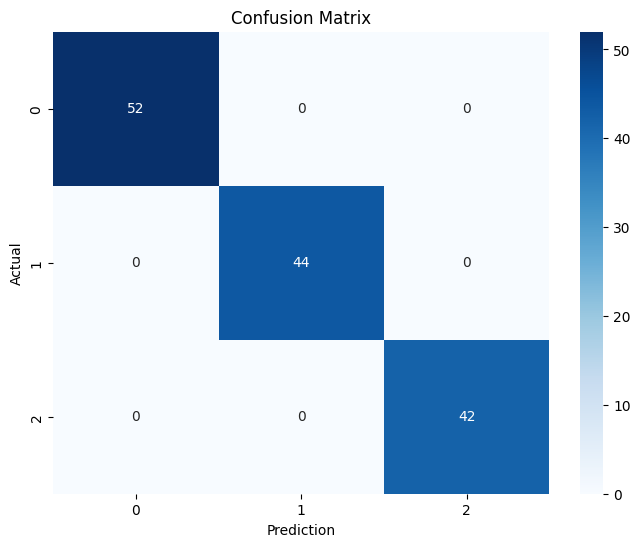

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
print("Precision:", precision)


Precision: 1.0


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

Recall: 1.0


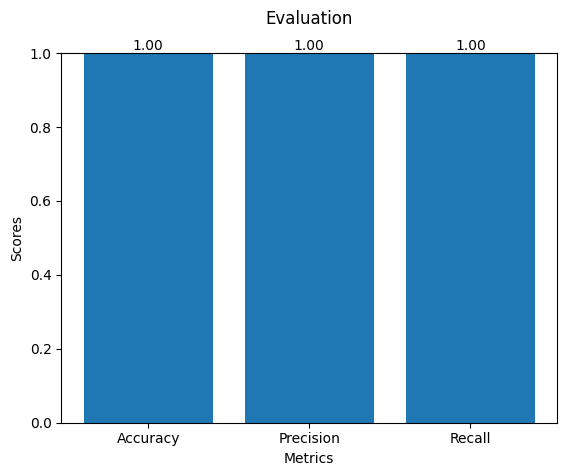

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

plt.bar(metrics, scores)

plt.ylim([0, 1])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation\n')

for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

EVALUASI DAN VALIDASI

In [ ]:
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(y_test, predictions)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 100 persen


In [ ]:
distances, indices = classifier.kneighbors(X_test_scaled)
print("Distance Matrix:")
print(distances)

Distance Matrix:
[[0.24509616 0.29142879 0.33445848]
 [0.66957576 0.71378873 0.8135468 ]
 [0.33806161 0.42858106 0.44647536]
 [0.22909265 0.36468122 0.37129409]
 [0.27220573 0.28241792 0.36192003]
 [0.35955731 0.4276187  0.43771931]
 [0.16333213 0.22275773 0.2424617 ]
 [0.26896384 0.38241853 0.38824146]
 [0.25198648 0.26234055 0.28370445]
 [0.27268856 0.31645271 0.31926641]
 [0.20794189 0.22172112 0.22475168]
 [0.52695164 0.52833839 0.67647202]
 [0.42264689 0.43822825 0.5195179 ]
 [0.49450943 0.62253477 0.65494899]
 [0.49215096 0.55966204 0.56195948]
 [0.14120821 0.25444112 0.31053291]
 [0.50088155 0.51267654 0.51630077]
 [0.2493655  0.28042299 0.29324669]
 [0.1533008  0.21838271 0.22854032]
 [0.37568673 0.42623017 0.45856057]
 [0.2178491  0.21810612 0.33099863]
 [0.1545789  0.32519439 0.42690293]
 [0.25383993 0.25916908 0.3726741 ]
 [0.2834453  0.29302734 0.42064067]
 [0.14646245 0.25913382 0.3114678 ]
 [0.27778047 0.35868996 0.39420949]
 [0.22417741 0.3179358  0.32721357]
 [0.4503070

In [ ]:
k_nearest_classes = [y_train.iloc[val[1]] for val in zip(*distances.nonzero())]
k_nearest_classes

['AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 'MIPA',
 'AGAMA',
 'MIPA',
 

In [ ]:
dis = distances[distances.nonzero()] # non-zero distances
dis

array([0.24509616, 0.29142879, 0.33445848, 0.66957576, 0.71378873,
       0.8135468 , 0.33806161, 0.42858106, 0.44647536, 0.22909265,
       0.36468122, 0.37129409, 0.27220573, 0.28241792, 0.36192003,
       0.35955731, 0.4276187 , 0.43771931, 0.16333213, 0.22275773,
       0.2424617 , 0.26896384, 0.38241853, 0.38824146, 0.25198648,
       0.26234055, 0.28370445, 0.27268856, 0.31645271, 0.31926641,
       0.20794189, 0.22172112, 0.22475168, 0.52695164, 0.52833839,
       0.67647202, 0.42264689, 0.43822825, 0.5195179 , 0.49450943,
       0.62253477, 0.65494899, 0.49215096, 0.55966204, 0.56195948,
       0.14120821, 0.25444112, 0.31053291, 0.50088155, 0.51267654,
       0.51630077, 0.2493655 , 0.28042299, 0.29324669, 0.1533008 ,
       0.21838271, 0.22854032, 0.37568673, 0.42623017, 0.45856057,
       0.2178491 , 0.21810612, 0.33099863, 0.1545789 , 0.32519439,
       0.42690293, 0.25383993, 0.25916908, 0.3726741 , 0.2834453 ,
       0.29302734, 0.42064067, 0.14646245, 0.25913382, 0.31146

In [ ]:
k_near = pd.DataFrame()
for val in zip(*distances.nonzero()):
    k_near = pd.concat([k_near, X_train.iloc[val[1]]], ignore_index=True)
k_near

,0
0,109.00
1,72.00
2,79.00
3,91.25
4,428.00
...,...
1651,77.50
1652,430.00
1653,89.25
1654,78.25


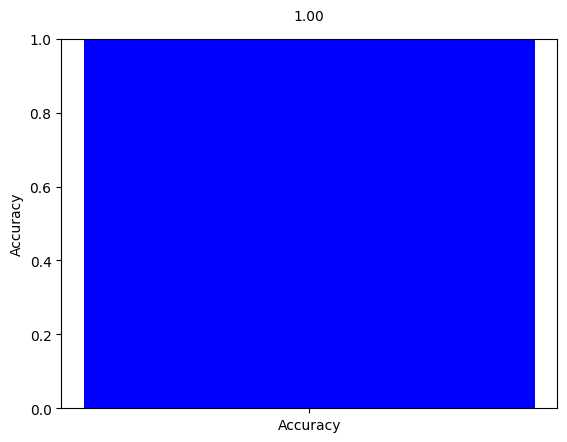

In [ ]:
accuracy = classifier.score(X_test_scaled, y_test)

fig, ax = plt.subplots()
ax.bar(['Accuracy'], [accuracy], color='blue')

ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)

for i, v in enumerate([accuracy]):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.show()